In [1]:
import numpy as np 
import random

In [2]:
#Populating
genpop= []
for i in range(100):
  pop = np.random.randint(2, size=(10,20))
  genpop.append(pop)

In [3]:
def fitness(arr):
  m_count=0
  r_count=0
  pm= np.zeros(shape=(1, 10))
  fit=0
  for j in range(20):
    for i in range(10):
      if j % 5 ==0:
        if arr [i,j] == 1:
          m_count = m_count+1
          pm[0,i] = pm[0,i]+1
      else:
        if arr [i,j] == 1:
          r_count = r_count+1
          pm[0,i] = pm[0,i]+1
    if m_count == 3:
      fit= fit + 10

    m_count=0

    if r_count== 2:
      fit = fit+10
    r_count=0
  
  for i in range(10):
    if pm[0,i] >=4 and pm[0,i] <=6:
      fit= fit + 1
  return fit


In [4]:
def mutation(arr):
  for i in range(10):
    for j in range(20):
      if random.uniform(0,1) > 0.5:
        if arr[i][j] == 0:
          arr[i][j] =1
        else:
          arr[i][j] = 0
  return arr

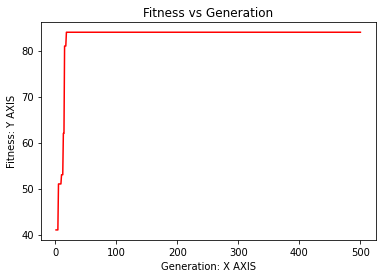

 Maximum Fitness:  84


In [5]:

# Generation Count: 500
order_sol= []
fittest= []
for i in range (500):
  for j in genpop:
    order_sol.append((fitness(j),j))
  
  #Rank Selection
  order_sol.sort(key= lambda y:y[0])
  order_sol.reverse()
  # print(" Generation ",i," best solution ")
  # print("Fitness value: ",order_sol[0][0])
  fittest.append(order_sol[0][0])
  
  best_sol = order_sol[:50]

  #Uniform crossover
  co_sol = []
  if random.uniform(0,1) <0.5:
    for j in range(0,49,2):
      a = best_sol[j][1]
      b= best_sol[j+1][1]
      co_sol.append(a)
      co_sol.append(b)
      c=a.copy()
      d=b.copy()
      for x in range(10):
        for y in range(20):
          p=random.uniform(0,1)
          if p <0.5:
            c[x][y]=a[x][y]
            d[x][y]=b[x][y]
          else:
            c[x][y]=b[x][y]
            d[x][y]=a[x][y]
      co_sol.append(c)
      co_sol.append(d)

  
  
  # Bit-Flip Mutation 
  if random.uniform(0,1) <0.01:
    if len(co_sol) == 100:
      for p in range(0,50):
        co_sol[p] = mutation(co_sol[p+50])
  
  genpop = co_sol.copy()



import matplotlib.pyplot as plt

y = fittest
x= np.arange(1, len(fittest)+1)

plt.title("Fitness vs Generation")
plt.xlabel("Generation: X AXIS")
plt.ylabel("Fitness: Y AXIS")
plt.plot(x, y, color ="red")
plt.show()

print(" Maximum Fitness: ", np.nanmax(fittest))


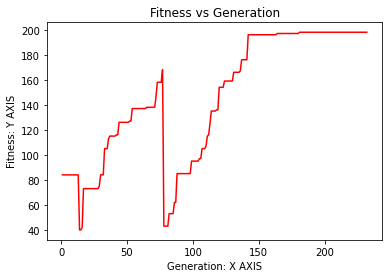

 Maximum Fitness:  198


In [6]:
# Generation Count: 500
order_sol= []
order_sol1 = []
fittest= []
for i in range (500):
  for j in genpop:
    order_sol.append((fitness(j),j))
  
  #Tournament Selection
  if len(order_sol) == 100:
    for i in range(0,100,2):
      if order_sol[i][0] > order_sol[i+1][0]:
        order_sol1.append(order_sol[i])
      else:
        order_sol1.append(order_sol[i+1])


  if len(order_sol) == 100:
    
    order_sol1.sort(key= lambda y:y[0])
    order_sol1.reverse()
    best_sol = order_sol1
    fittest.append(best_sol[0][0])
    order_sol1= []
    order_sol = []
  elif len(order_sol) == 50:
    order_sol.sort(key= lambda y:y[0])
    order_sol.reverse()
    best_sol = order_sol
    fittest.append(best_sol[0][0])
    order_sol1= []
    order_sol= []

  #Uniform crossover
  co_sol = []
  if random.uniform(0,1) <0.5:
    for j in range(0,49,2):
      a = best_sol[j][1]
      b= best_sol[j+1][1]
      co_sol.append(a)
      co_sol.append(b)
      c=a.copy()
      d=b.copy()
      for x in range(10):
        for y in range(20):
          p=random.uniform(0,1)
          if p <0.5:
            c[x][y]=a[x][y]
            d[x][y]=b[x][y]
          else:
            c[x][y]=b[x][y]
            d[x][y]=a[x][y]
      co_sol.append(c)
      co_sol.append(d)

  
  
  # Bit-Flip Mutation 
  if random.uniform(0,1) <0.01:
    if len(co_sol) == 100:
      for p in range(0,50):
        co_sol[p] = mutation(co_sol[p+50])
  
  genpop = co_sol.copy()

y = fittest
x= np.arange(1, len(fittest)+1)

plt.title("Fitness vs Generation")
plt.xlabel("Generation: X AXIS")
plt.ylabel("Fitness: Y AXIS")
plt.plot(x, y, color ="red")
plt.show()

print(" Maximum Fitness: ", np.nanmax(fittest))